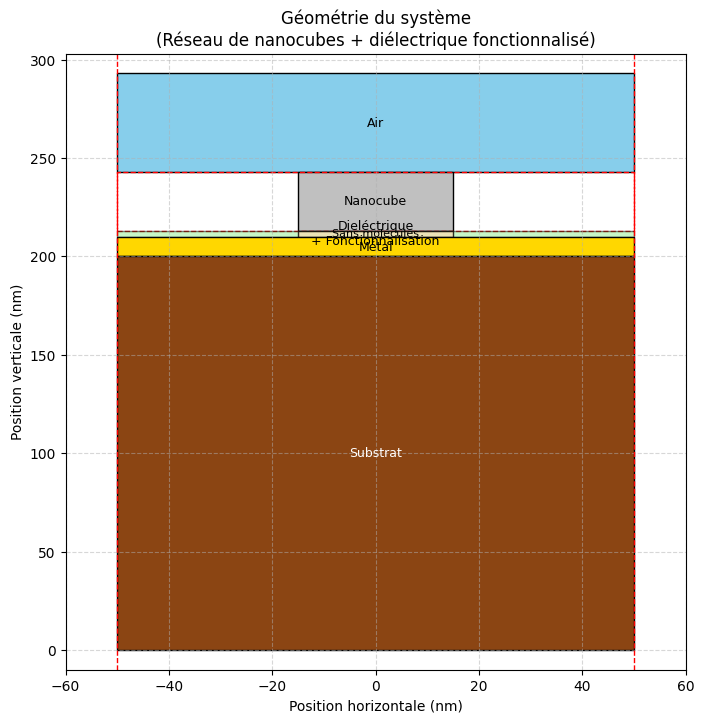

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_geometry(geometry):
    """
    Affiche la géométrie du système en coupe latérale en indiquant :
      - La pile verticale des couches (de haut en bas) :
          * Superstrat (air)
          * Nanocubes (réseau périodique)
          * Couche diélectrique fonctionnalisée 
             (les zones inter-nanocubes contiennent molécules et fonctionalisation,
              tandis que sous les nanocubes, cette fonctionnalisation est absente)
          * Couche métallique (incluant l'adhérence)
          * Substrat
      - La périodicité horizontale du réseau des nanocubes.
    
    Paramètres :
        geometry (dict) : Dictionnaire contenant les dimensions (en nm) :
            - thick_super : épaisseur du superstrat (air)
            - cube_height   : hauteur des nanocubes
            - cube_width    : largeur des nanocubes (supposés carrés)
            - period        : périodicité horizontale du réseau
            - thick_dielectric : épaisseur de la couche diélectrique
            - thick_metal : épaisseur de la couche métallique (avec adhérence)
            - thick_sub        : épaisseur du substrat
    """
    # Récupération des paramètres
    thick_super      = geometry["thick_super"]
    cube_height      = geometry["cube_height"]
    cube_width       = geometry["cube_width"]
    period           = geometry["period"]
    thick_dielectric = geometry["thick_dielectric"]
    thick_metal      = geometry["thick_metal"]
    thick_sub        = geometry["thick_sub"]
    
    # On définit la zone fonctionnalisée dans le diélectrique :
    # Ici, on suppose que dans le diélectrique, la partie hors de la zone du nanocube
    # (centré dans la période) est fonctionnalisée.
    # La zone sous le nanocube (de largeur = cube_width) restera non fonctionnalisée.
    
    # Calcul de la hauteur totale (de haut en bas)
    total_height = thick_super + cube_height + thick_dielectric + thick_metal + thick_sub
    
    # Calcul des positions verticales (en nm), en partant du haut (y = total_height) vers le bas (y = 0)
    y_top             = total_height
    y_air_bottom      = y_top - thick_super
    y_cube_bottom     = y_air_bottom - cube_height
    y_dielectric_top  = y_cube_bottom
    y_dielectric_bot  = y_dielectric_top - thick_dielectric
    y_metal_top       = y_dielectric_bot
    y_metal_bot       = y_metal_top - thick_metal
    y_sub_bot         = 0  # substrat en bas

    # Création de la figure
    fig, ax = plt.subplots(figsize=(8, 8))
    # Axe horizontal : on affiche une période complète avec un petit margin
    margin = period * 0.1
    ax.set_xlim(-period/2 - margin, period/2 + margin)
    ax.set_ylim(0 - 10, total_height + 10)
    
    # 1. Superstrat (air)
    rect_air = patches.Rectangle((-period/2, y_air_bottom), period, thick_super,
                                 linewidth=1, edgecolor='black', facecolor='skyblue')
    ax.add_patch(rect_air)
    ax.text(0, y_air_bottom + thick_super/2, "Air", ha='center', va='center', fontsize=9)
    
    # 2. Nanocubes : on les dessine centrés horizontalement dans la période
    x_cube = -cube_width/2
    rect_cube = patches.Rectangle((x_cube, y_cube_bottom), cube_width, cube_height,
                                  linewidth=1, edgecolor='black', facecolor='silver')
    ax.add_patch(rect_cube)
    ax.text(0, y_cube_bottom + cube_height/2, "Nanocube", ha='center', va='center', fontsize=9)
    
    # Visualisation de la périodicité : tracer les bords de la période
    ax.axvline(-period/2, color='red', linestyle="--", linewidth=1)
    ax.axvline(period/2, color='red', linestyle="--", linewidth=1)
    # Optionnel : encadrer la zone de la période
    period_rect = patches.Rectangle((-period/2, y_cube_bottom), period, cube_height, 
                                    linewidth=1, edgecolor="red", facecolor="none", linestyle="--")
    ax.add_patch(period_rect)
    
    # 3. Couche diélectrique fonctionnalisée
    # On dessine d'abord le fond de la couche (fonctionnalisée)
    rect_dielectric = patches.Rectangle((-period/2, y_dielectric_bot), period, thick_dielectric,
                                        linewidth=1, edgecolor='black', facecolor='lightgreen', alpha=0.5)
    ax.add_patch(rect_dielectric)
    ax.text(0, y_dielectric_bot + thick_dielectric/2, "Dieléctrique\n+ Fonctionnalisation", 
            ha='center', va='center', fontsize=9)
    
    # Puis, on superpose la zone non fonctionnalisée, c'est-à-dire celle sous les nanocubes.
    # Cette zone est centrée horizontalement, de largeur = cube_width.
    rect_nonfunc = patches.Rectangle((-cube_width/2, y_dielectric_bot), cube_width, thick_dielectric,
                                     linewidth=1, edgecolor='black', facecolor='wheat', alpha=0.8)
    ax.add_patch(rect_nonfunc)
    ax.text(0, y_dielectric_bot + thick_dielectric/2, "Sans molécules", 
            ha='center', va='center', fontsize=8, color="black")
    
    # 4. Couche métallique (incluant éventuellement la couche d'adhérence)
    rect_metal = patches.Rectangle((-period/2, y_metal_bot), period, thick_metal,
                                   linewidth=1, edgecolor='black', facecolor='gold')
    ax.add_patch(rect_metal)
    ax.text(0, y_metal_bot + thick_metal/2, "Métal", ha='center', va='center', fontsize=9)
    
    # 5. Substrat
    rect_sub = patches.Rectangle((-period/2, 0), period, y_metal_bot,
                                 linewidth=1, edgecolor='black', facecolor='saddlebrown')
    ax.add_patch(rect_sub)
    ax.text(0, y_metal_bot/2, "Substrat", ha='center', va='center', fontsize=9, color="white")
    
    # Axes et titre
    ax.set_xlabel("Position horizontale (nm)")
    ax.set_ylabel("Position verticale (nm)")
    ax.set_title("Géométrie du système\n(Réseau de nanocubes + diélectrique fonctionnalisé)")
    ax.grid(True, linestyle="--", alpha=0.5)
    
    plt.show()

# Définition des paramètres de la géométrie
geometry = {
    "thick_super": 50,         # Épaisseur du superstrat (air)
    "cube_height": 30,         # Hauteur des nanocubes
    "cube_width": 30,          # Largeur (et profondeur) des nanocubes
    "period": 100,             # Périodicité horizontale du réseau
    "thick_dielectric": 3,     # Épaisseur de la couche diélectrique fonctionnalisée
    "thick_metal": 10,         # Épaisseur de la couche métallique (adhérence incluse)
    "thick_sub": 200           # Épaisseur du substrat
}

plot_geometry(geometry)
